In [50]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Najpierw pobierzmy dane korzystając z podanego na stronie API:

In [3]:
forest_get = requests.get("https://api.apispreadsheets.com/api/dataset/forest-fires/")
forest_dict = forest_get.json()

Sprawdźmy jakie klucze zawiera nasz słownik:

In [4]:
forest_dict.keys()

dict_keys(['data'])

Skoro tak to sprawdźmy jaki typ danych reprezentuje nasz jedyny klucz:

In [5]:
type(forest_dict['data'])

list

Zobaczmy teraz jak wygląda dowolny element listy:

In [7]:
forest_dict['data'][0]

{'DC': 94.3,
 'DMC': 26.2,
 'FFMC': 86.2,
 'ISI': 5.1,
 'RH': 51.0,
 'X': 7,
 'Y': 5,
 'area': 0.0,
 'day': 'fri',
 'month': 'mar',
 'rain': 0.0,
 'temp': 8.2,
 'wind': 6.7}

Teraz wiemy już jak stworzyć z tego słownika ramkę danych:

In [8]:
forest_df = pd.DataFrame(forest_dict['data'],columns=forest_dict['data'][0].keys())
forest_df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


In [9]:
forest_df.info()
forest_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Teraz zobaczmy jak prezentują się rozkłady dla poszczególnych kategorii:

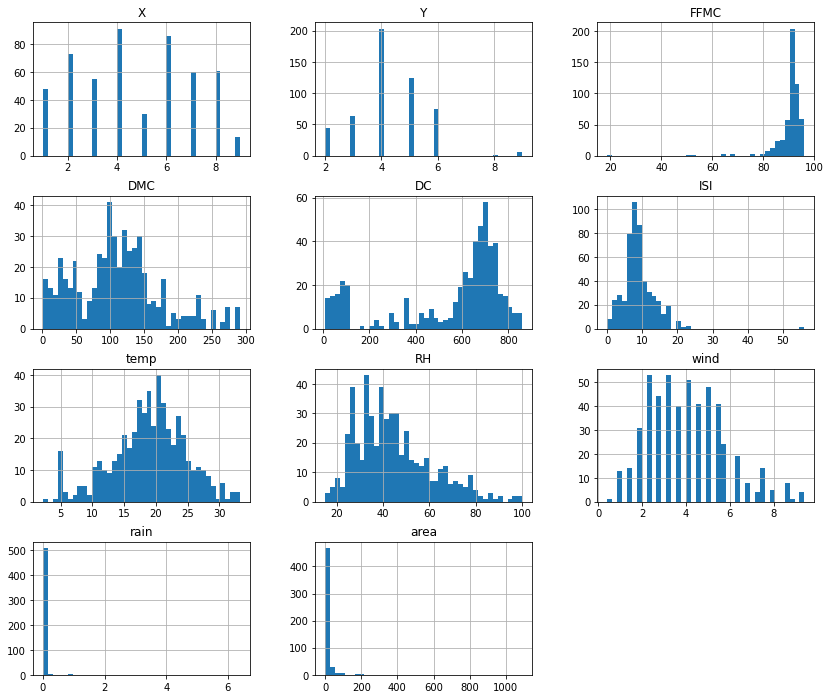

In [11]:
forest_df.hist(bins = 40, figsize=(14, 12))
plt.show()

Teraz sprawdźmy zależności pomiędzy zmienną *area* (jako że to ona jest obiektem naszego zainteresowania) a wszystkimi pozostałymi:

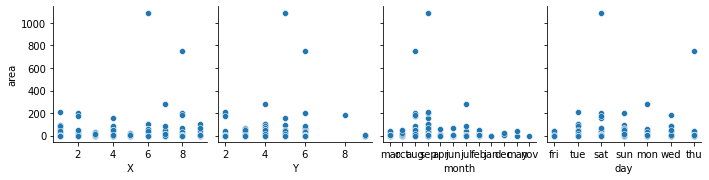

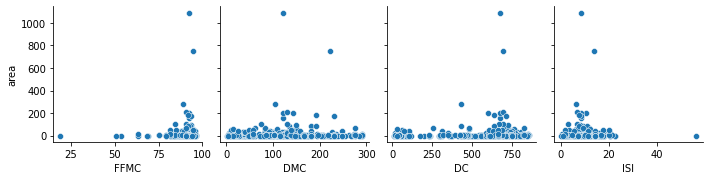

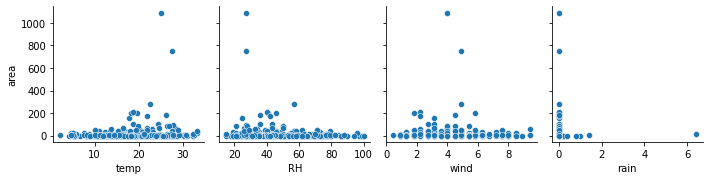

In [12]:
sns.pairplot(forest_df, y_vars="area", x_vars=forest_df.columns.values[:4])
sns.pairplot(forest_df, y_vars="area", x_vars=forest_df.columns.values[4:8])
sns.pairplot(forest_df, y_vars="area", x_vars=forest_df.columns.values[8:12])

plt.show()

Zgodnie z sugestią zamieszczoną w poleceniu, przyjrzyjmy się szczególniej zmiennym typu ciągłego. Odrzućmy dodatkowo outliery przyjmując górną granicę wartości zmiennej *area* na 300:

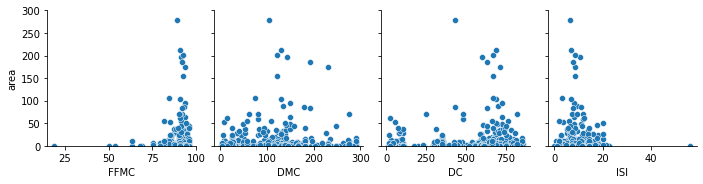

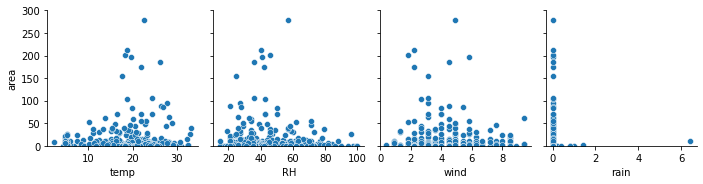

In [13]:
sns.pairplot(forest_df, y_vars="area", x_vars=forest_df.columns.values[4:8])
axes = plt.gca()
axes.set_ylim([0,300])
sns.pairplot(forest_df, y_vars="area", x_vars=forest_df.columns.values[8:12])
axes = plt.gca()
axes.set_ylim([0,300])
plt.show()

Mając do dyspozycji współrzędne określonych obszarów lasu aż się prosi, aby zwizualizować je na mapie. W tym celu policzmy średnią wszystkich wartości zmiennej *area* w danym obszarze, a następnie zwizualizujmy je przy pomocy heatmapy:

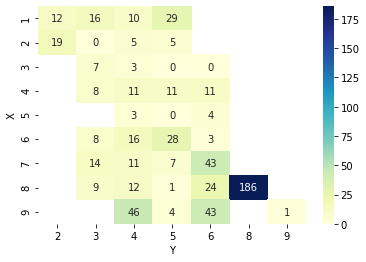

In [18]:
forest_mean = forest_df.groupby(['X','Y']).mean().reset_index()
sns.heatmap(forest_mean.pivot("X","Y","area"),cmap="YlGnBu",annot=True,fmt=".0f")
plt.show()

Jeden obszar zdaje się być narażony na wyjątkowo duże pożary. Zapewne jednak jest to efekt pojedynczej obserwacji, podczas gdy wszystkie inne są uśrednione (a z racji na to, że zdcydowana większość wartości jest bliska zeru, to i średnia będzie bardzo niska). Sprawdźmy to:

In [51]:
forest_df[forest_df.X == 8][forest_df.Y==8]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
420,8,8,aug,wed,91.7,191.4,635.9,7.8,26.2,36.0,4.5,0.0,185.76


Skoro już jesteśmy przy heatmapach, to sprawdźmy częstotliwość pożarów w danym obszarze.

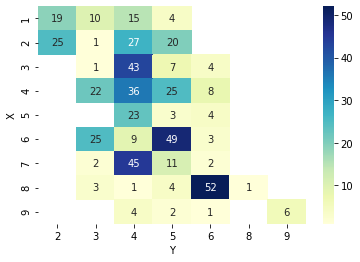

In [19]:
forest_count = forest_df.groupby(['X','Y']).count().reset_index()
sns.heatmap(forest_count.pivot("X","Y","area"),cmap="YlGnBu",annot=True,fmt=".0f")
plt.show()

Skoro już sprawdziliśmy miejsce, zajmijmy się czasem i sprawdźmy w jakich miesiącach najczęściej występują pożary.

In [49]:
forest_month=forest_df[forest_df.area>0].groupby("month").count().reset_index()[["month","X"]]
forest_month.sort_values(["X"],ascending=False)

,month,X
1,aug,99
9,sep,97
6,mar,19
4,jul,18
3,feb,10
2,dec,9
5,jun,8
8,oct,5
0,apr,4
7,may,1


Sprawdźmy teraz jak wygląda boxplot dla zmiennej *area*, dodatkowo obliczając medianą, średnią i kwartyle. Ze względu na gigantyczny ogon rozkładu tej zmiennej, przy rysowaniu wykresu ograniczmy się do wartości mniejszych niż 20:

mediana = 0.52
średnia = 12.847292069632491
Q1 = 0.0
Q3 = 6.57


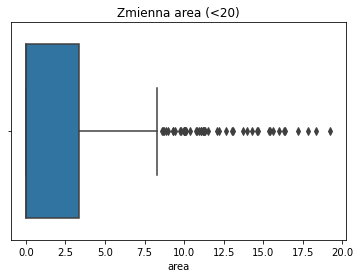

In [52]:
box_plot = sns.boxplot(forest_df[forest_df.area<20]['area'])
box_plot.set_title('Zmienna area (<20)')

print('mediana = %s' % np.median(forest_df['area']))
print('średnia = %s' % np.mean(forest_df['area']))
print('Q1 = %s' %np.percentile(forest_df['area'], 25))
print('Q3 = %s' %np.percentile(forest_df['area'], 75))

Bez tego zawężenia, boxplot wyglądałby tak:

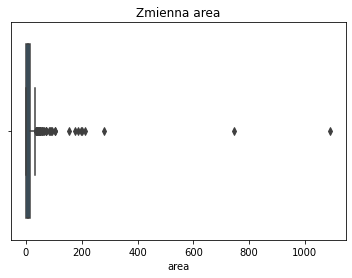

In [54]:
box_plot = sns.boxplot(forest_df[forest_df.area>0]['area'])
box_plot.set_title('Zmienna area')
plt.show()

A teraz zobaczmy jak wygląda boxplot dla wszystkich niezerowych wartości tej zmiennej (obcinając go dodatkowo z góry do wartości mniejszych niż 100). Policzmy też jak wyglądają mediana, średnia i kwartyle dla niezerowych wartości tej zmiennej:

mediana = 6.37
średnia = 24.60018518518518
Q1 = 2.14
Q3 = 15.4225


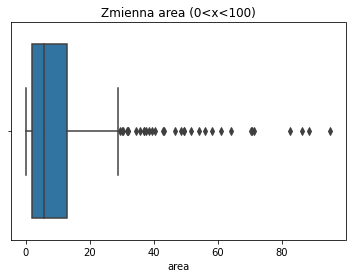

In [55]:
box_plot = sns.boxplot(forest_df[forest_df.area>0][forest_df.area<100]['area'])
box_plot.set_title('Zmienna area (0<x<100)')
print('mediana = %s' % np.median(forest_df[forest_df.area>0]['area']))
print('średnia = %s' % np.mean(forest_df[forest_df.area>0]['area']))
print('Q1 = %s' %np.percentile(forest_df[forest_df.area>0]['area'], 25))
print('Q3 = %s' %np.percentile(forest_df[forest_df.area>0]['area'], 75))

Teraz ponownie przyjrzyjmy się rozkładowi zmiennej *area*, tym razem (podobnie jak wyżej) obcinając ją do wartości niezerowych i mniejszych od 100:

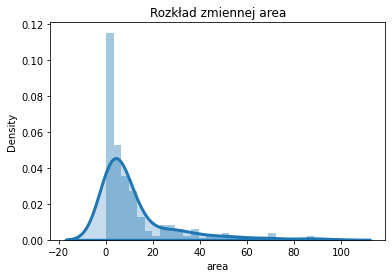

In [56]:
plot_dens=sns.distplot(forest_df[forest_df.area>0][forest_df.area<100]['area'], hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plot_dens.set_title('Rozkład zmiennej area')
plt.show()

Na koniec przyjrzyjmy się automatycznej eksploracji danych z użyciem *pandas profiling* (wyniki w pliku *output.html*):

In [ ]:
!pip install pandas-profiling==2.7.1

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(forest_df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Bardzo podoba mi się te narzędzie. Jeśli miałbym wskazać jego ograniczenia, to jedyne co przychodzi mi do głowy, to czas generowania raportu. Dane w tym zbiorze zawierały "jedynie" 517 rekordów, a zajęło to niemal minutę, więc spodziewam się, że dla rekordów liczonych w dziesiątkach lub setkach tysięcy, tego typu rozwiązanie okaże się zupełnie bezużyteczne.







